# vid2mUS
<br>

#### Generating M-mode images from LUS videos
---

### Import Libraries

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm
import shutil

### Directories

In [2]:
ROOT= os.getcwd()
print('You are located in:\n"'+ROOT+'"')

You are located in:
"[omitted to protect privacy]\workspace\POCUS_videos"


### Creating an M-mode image

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:10<00:00,  1.12s/it]


>> M-mode image (1080, 680) generated from video: score 3 y derrame.mp4 (136 frames)!


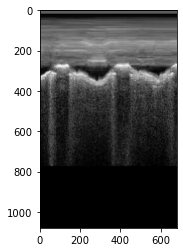

In [8]:
percentage_sampling_coordinate=0.4 # range: [0,1]
save_dir= 'data_HUFA'
dir_in= 'videos_HUFA'
###########################################################################################
#shutil.rmtree(save_dir)
os.mkdir(save_dir)
#video_list=['Reg-grep-normal-alines-original.mp4'] # debugging only: process specific video
video_list= os.listdir(dir_in)
for video_name in tqdm(video_list):
    vidcap = cv2.VideoCapture(os.path.join(dir_in,video_name))
    success,image = vidcap.read()
    count = 0

    frames_list= []
    while success:
        #cv2.imwrite("frames_debugging/"+f'{count:03}'+".jpg", image)     # save frame as JPEG file      
        frames_list.append(image[:,:,0])
        success,image = vidcap.read()
        count += 1

    sampling_line_width=5
    sampling_coord= round(frames_list[0].shape[1]*percentage_sampling_coordinate)

    sampled_line_list= []
    for frame in frames_list:    
        #img= cv2.imread(os.path.join('videos',frame))  # debugging only
        img=frame
        sampled_line_list.append(img[:,sampling_coord:sampling_coord+sampling_line_width])

    m_image_shape= (sampled_line_list[0].shape[0], len(sampled_line_list)*(sampling_line_width))

    m_image= np.zeros(m_image_shape)

    for i in range(len(sampled_line_list)):
        m_image[:,sampling_line_width*(i):sampling_line_width*(i+1)]= sampled_line_list[i]

    cv2.imwrite(save_dir+'/%s.jpg' % video_name, m_image)
    
    
plt.imshow(m_image,cmap='gray')
print('>> M-mode image',m_image.shape,'generated from video:', video_name, '('+str(count)+' frames)!')

---
Bioteslaso